In [10]:
""" Import module für alle Fälle"""
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from ipywidgets import interact
from ipywidgets import IntSlider, FloatSlider, Dropdown, FloatText

In [11]:
""" csv in Data Frame umwandeln - nicht weiterverfolgen wird von anderem Team Mitglied erledigt"""
shop_eu = pd.read_csv("Daten_Aufgabe_1 - Shopauswertung.csv")
shop_eu= pd.DataFrame(shop_eu)


In [12]:
""" excel in Data Frame umwandeln - vorher excel vorbereitet als shop_de.xlsx."""
a = pd.read_excel("shop_de.xlsx")
shop_de = pd.DataFrame(a)
shop_de.head(1)

,Datum,Umsatz P1,Umsatz P2,Umsatz P3
0,Jan,15562.548244,14774.456985,148945.16665


In [13]:
shop_de["Umsatz P1"] = round(shop_de["Umsatz P1"],2)
shop_de["Umsatz P2"] = round(shop_de["Umsatz P2"],2)
shop_de["Umsatz P3"] = round(shop_de["Umsatz P3"],2)
shop_de["Gesamt"] = shop_de["Umsatz P1"] + shop_de["Umsatz P2"] + shop_de["Umsatz P3"]
shop_de.head(12)

,Datum,Umsatz P1,Umsatz P2,Umsatz P3,Gesamt
0,Jan,15562.55,14774.46,148945.17,179282.18
1,Feb,14055.57,15176.47,128859.95,158091.99
2,Mrz,15633.91,18280.33,141602.71,175516.95
3,Apr,15792.85,19095.32,133780.49,168668.66
4,Mai,16947.49,20206.11,135993.78,173147.38
5,Jun,17082.75,20056.65,135206.77,172346.17
6,Jul,17965.03,22288.14,143531.78,183784.95
7,Aug,17720.17,21707.81,139714.63,179142.61
8,Sep,16870.28,21084.84,130178.03,168133.15
9,Okt,17579.24,21564.91,128966.72,168110.87


In [34]:
""" Excel original Blätter one vorbereitung als variaable speichern"""
df_1 = pd.read_excel("Daten_Aufgabe_1 - Shop Analyse.xlsx", sheet_name="P1")
df_2 = pd.read_excel("Daten_Aufgabe_1 - Shop Analyse.xlsx", sheet_name="P2")
df_3 = pd.read_excel("Daten_Aufgabe_1 - Shop Analyse.xlsx", sheet_name="P3")

""" Spalten umbenenen"""
df_1.rename(columns={"Datum":"Monat", "Umsatz":"Produkt_A_DE"}, inplace=True)
df_2.rename(columns={"Datum":"Monat", "Umsatz":"Produkt_B_DE"}, inplace=True)
df_3.rename(columns={"Datum":"Monat", "Umsatz":"Produkt_C_DE"}, inplace=True)
#Monat	Produkt_A	Produkt_B	Produkt_C	A+B+C

"""DataFrames zusammenführen"""
#shop_de_1= pd.concat([df_1, df_2, df_3])
shop_de_1 = pd.merge(df_1, df_2, on="Monat")
shop_de_2 = pd.merge(shop_de_1, df_3, on="Monat")

""" Index zurücksetzen so das "Monat" wird index"""
#shop_de_2.set_index("Monat", inplace=True)

""" Werte Umsatz runden, Spalte Gesamt zufügen mit Gesamtumsatz alle produkte"""

shop_de_2["Produkt_A_DE"] = round(shop_de_2["Produkt_A_DE"],2)
shop_de_2["Produkt_B_DE"] = round(shop_de_2["Produkt_B_DE"],2)
shop_de_2["Produkt_C_DE"] = round(shop_de_2["Produkt_C_DE"],2)
shop_de_2["Gesamt"] = shop_de_2["Produkt_A_DE"] + shop_de_2["Produkt_B_DE"] + shop_de_2["Produkt_C_DE"]

shop_de_2 = pd.DataFrame(shop_de_2)

shop_de_2["Monat"].replace({"Jan":"January", "Feb":"February", "Mrz":"March", "Apr":"April",
                            "Mai":"May", "Jun":"June", "Jul":"July", "Aug":"August", "Sep":"September",
                            "Okt":"October", "Nov":"November", "Dez":"December"}, inplace=True)

shop_de_2.style.format(thousands=",")

shop_de_2
   


,Monat,Produkt_A_DE,Produkt_B_DE,Produkt_C_DE,Gesamt
0,January,15562.55,14774.46,148945.17,179282.18
1,February,14055.57,15176.47,128859.95,158091.99
2,March,15633.91,18280.33,141602.71,175516.95
3,April,15792.85,19095.32,133780.49,168668.66
4,May,16947.49,20206.11,135993.78,173147.38
5,June,17082.75,20056.65,135206.77,172346.17
6,July,17965.03,22288.14,143531.78,183784.95
7,August,17720.17,21707.81,139714.63,179142.61
8,September,16870.28,21084.84,130178.03,168133.15
9,October,17579.24,21564.91,128966.72,168110.87


Jährliche Verkauf: Durchschnitt = 171194, Max = 183785, Min = 183785


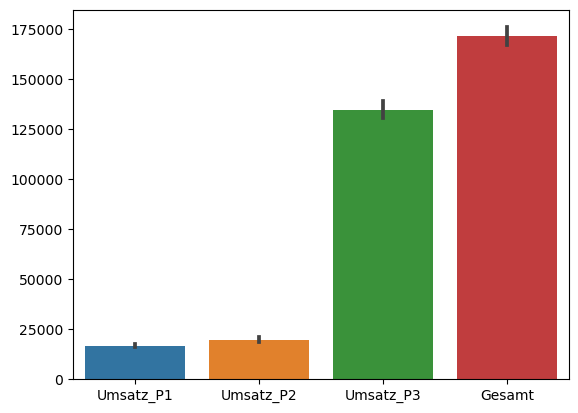

In [65]:
w1 = shop_de_2["Gesamt"].mean()
w2 = shop_de_2["Gesamt"].max()
w3 = shop_de_2["Gesamt"].max()
print(f"Jährliche Verkauf: Durchschnitt = {round(w1)}, Max = {round(w2)}, Min = {round(w3)}")
sns.barplot(shop_de_2)
plt.savefig("Produkt Anteile in Umsatz")


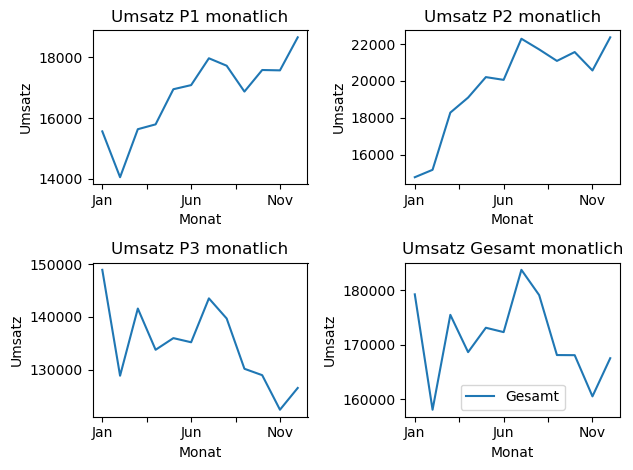

In [61]:
fig, axs = plt.subplots(2, 2, tight_layout=True)

a = shop_de_2.plot(x="Monat", y="Umsatz_P1", title="Umsatz P1 monatlich", 
               xlabel="Monat", ylabel="Umsatz",legend=False, ax=axs[0,0]
               )

b = shop_de_2.plot(x="Monat", y="Umsatz_P2", title="Umsatz P2 monatlich", 
               xlabel="Monat", ylabel="Umsatz",legend=False, ax=axs[0,1])

c = shop_de_2.plot(x="Monat", y="Umsatz_P3", title="Umsatz P3 monatlich", 
               xlabel="Monat", ylabel="Umsatz",legend=False, ax=axs[1,0])

d = shop_de_2.plot(x="Monat",y="Gesamt", title="Umsatz Gesamt monatlich", 
               xlabel="Monat", ylabel="Umsatz",ax=axs[1,1])

fig.savefig("Umsatz pro Produkt shop_de")
